# AudioSet models
Single predictor models using AudioSet regressors for auditory object recognition

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_single_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = ["as-Animal", "as-Music", "as-Whistling", "as-Vehicle", "as-Silence", "as-Tools", "as-Noise", "as-Water", "as-Wind", "as-Hands", "as-Wood"]
control = ['rms']

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05',  'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

In [6]:
transformations = [{"Name": "Scale", 
                    "Demean": True, 
                    "Rescale": True,
                    "ReplaceNA": "after", 
                    "Input": ["rms"]}]

## Create models

In [7]:
single_models = create_single_models(predictors, confounds, control=control, transformations=transformations)

In [8]:
filename = Path('models') / 'audioset_rms.json'

In [9]:
dump_collection(single_models, filename)

In [10]:
single_models = load_collection(filename)

### Reports

In [18]:
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [ ]:
for p in predictors:
    single_models[p]['Raiders']['raiders'].plot_report()

## Inspect regressors

In [9]:
df = _extract_regressors(single_models)

In [ ]:
plot_regressor('distribution', df=df, split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor('timeseries', df=df, split_by='row', height=1.2, aspect=10)

In [12]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [12]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.compile()
    else:
        print(f'Status: {model.status} for {pred}, {dataset}, {task}')

Status: PENDING for as-Animal, HealthyBrainNetwork, movieDM
Status: PENDING for as-Animal, LearningTemporalStructure, movie
Status: PENDING for as-Animal, Life, life
Status: PENDING for as-Animal, ParanoiaStory, story
Status: PENDING for as-Animal, Raiders, raiders
Status: PENDING for as-Animal, SchematicNarrative, perception
Status: PENDING for as-Animal, Sherlock, sherlockPart1
Status: PENDING for as-Animal, SherlockMerlin, MerlinMovie
Status: PENDING for as-Animal, SherlockMerlin, SherlockMovie
Status: PENDING for as-Animal, studyforrest, movie
Status: PENDING for as-Hands, HealthyBrainNetwork, movieDM
Status: PENDING for as-Hands, LearningTemporalStructure, movie
Status: PENDING for as-Hands, Life, life
Status: PENDING for as-Hands, ParanoiaStory, story
Status: PENDING for as-Hands, Raiders, raiders
Status: PENDING for as-Hands, SchematicNarrative, perception
Status: PENDING for as-Hands, Sherlock, sherlockPart1
Status: PENDING for as-Hands, SherlockMerlin, MerlinMovie
Status: PEND

## Results

In [21]:
flat_models = flatten_collection(single_models)

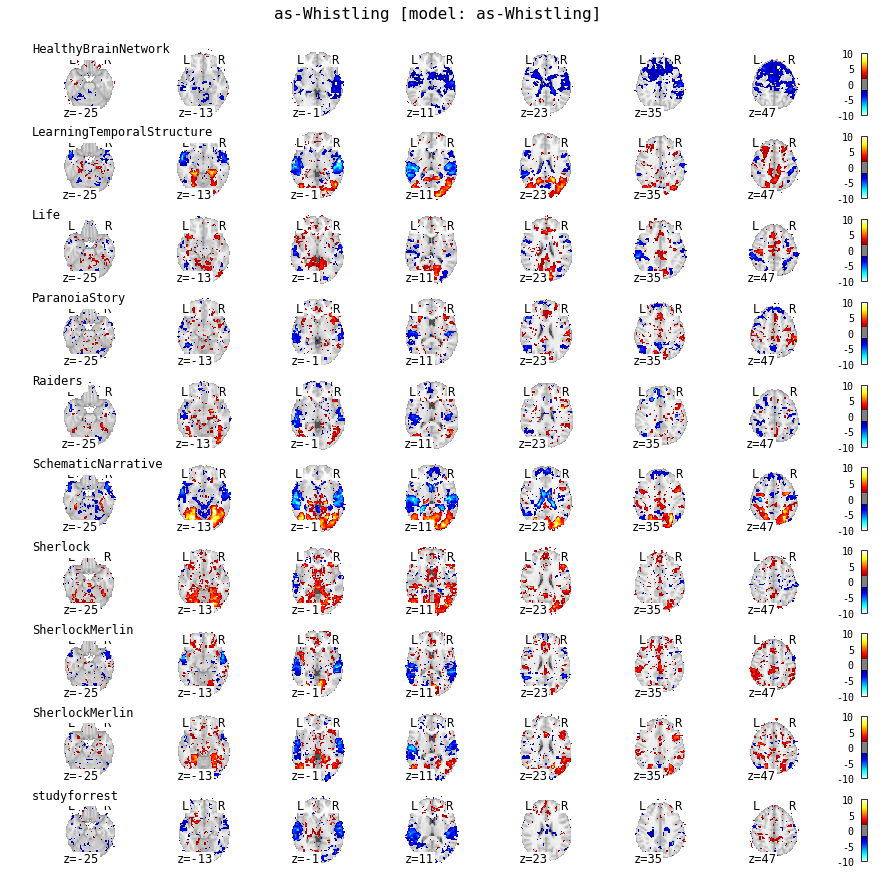

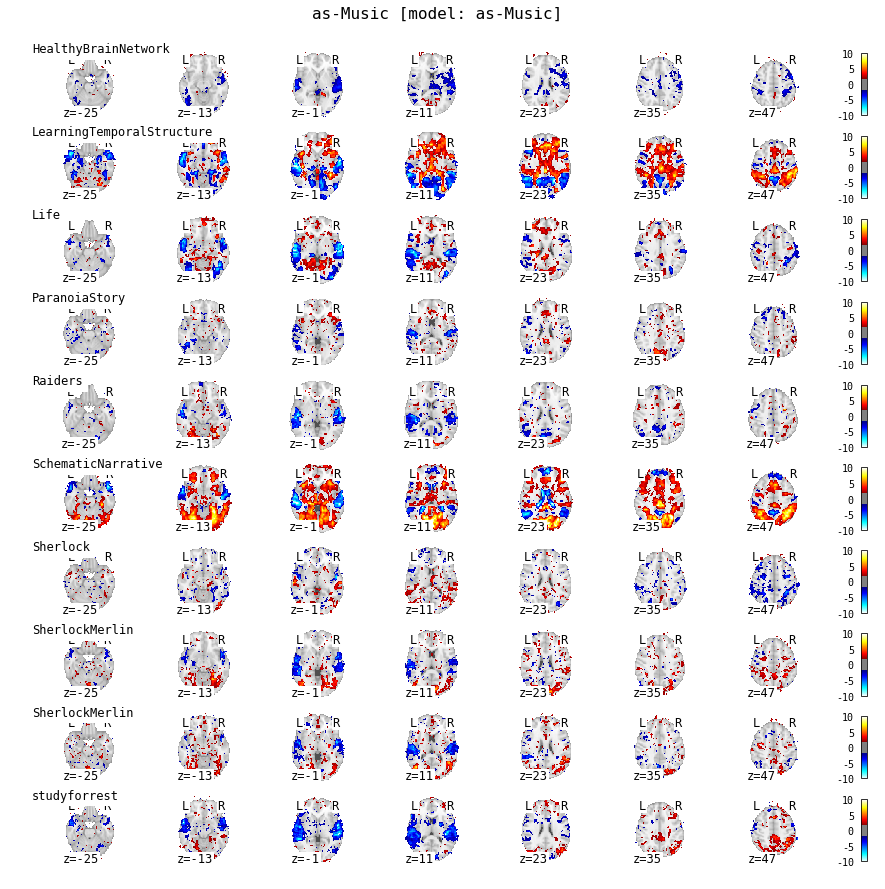

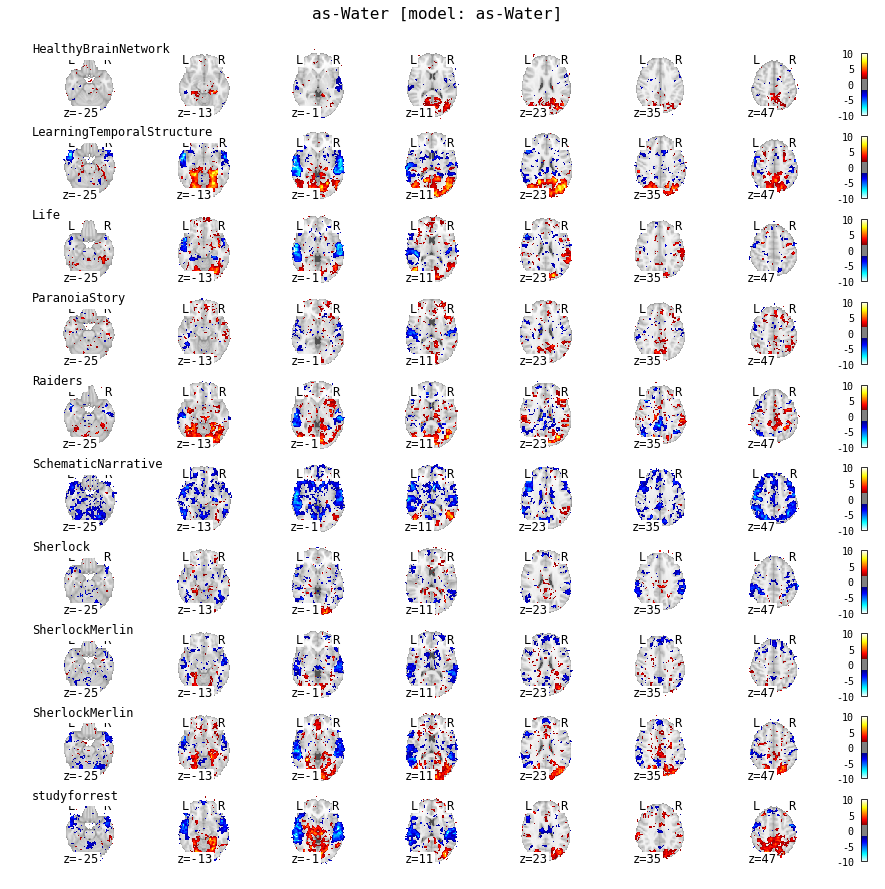

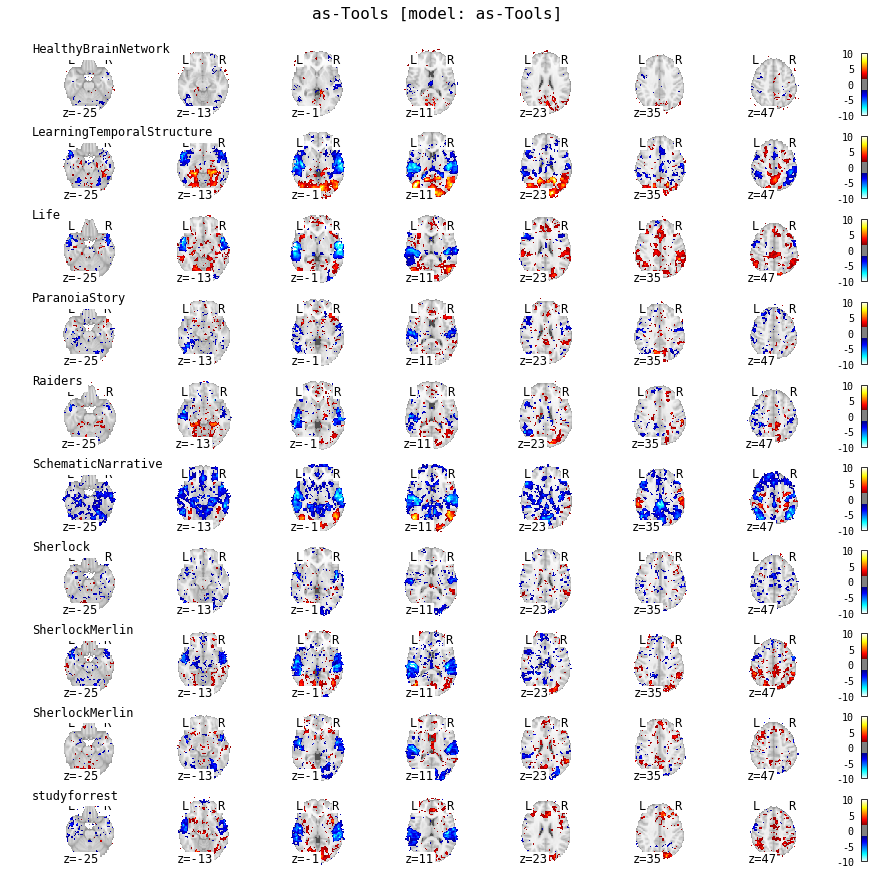

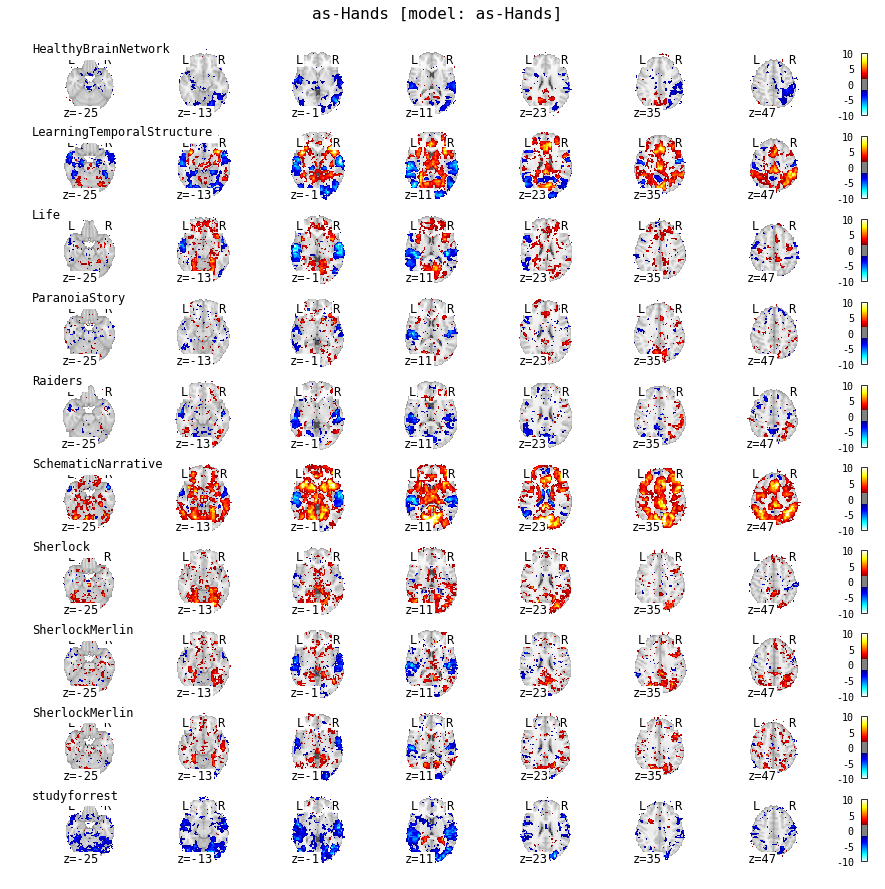

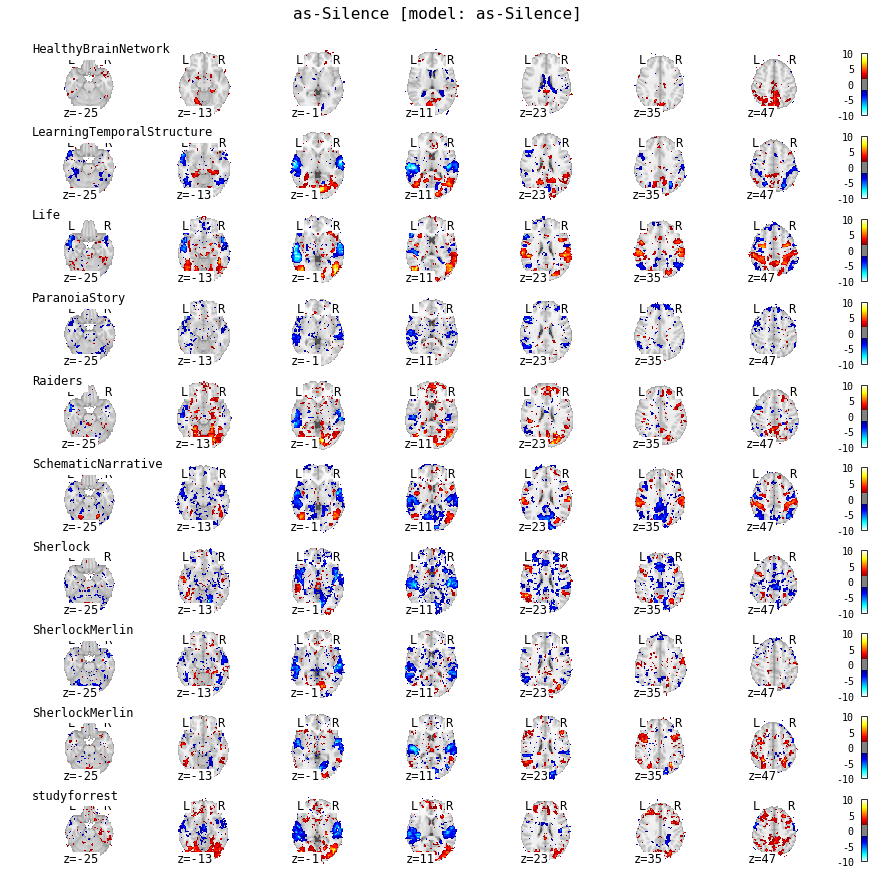

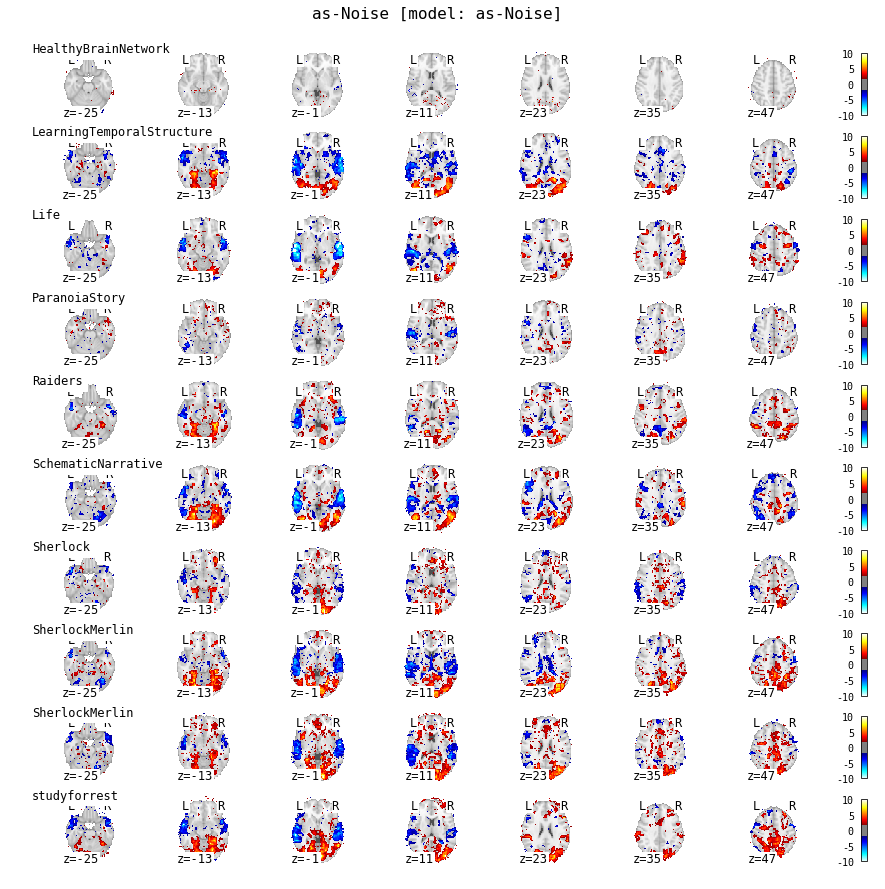

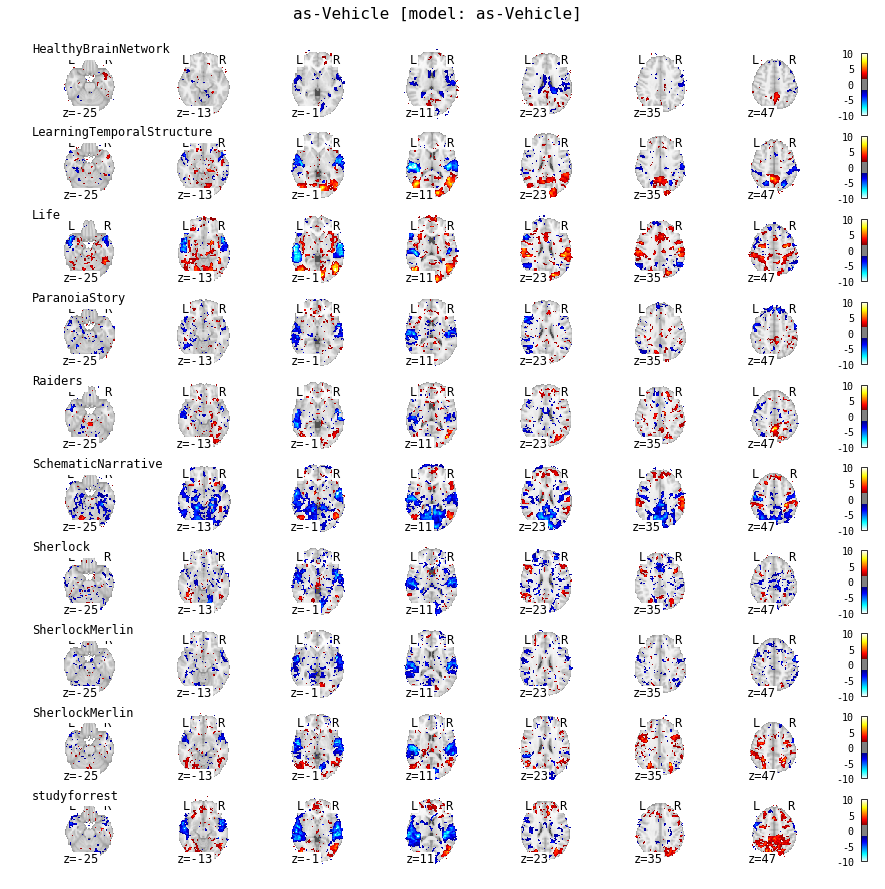

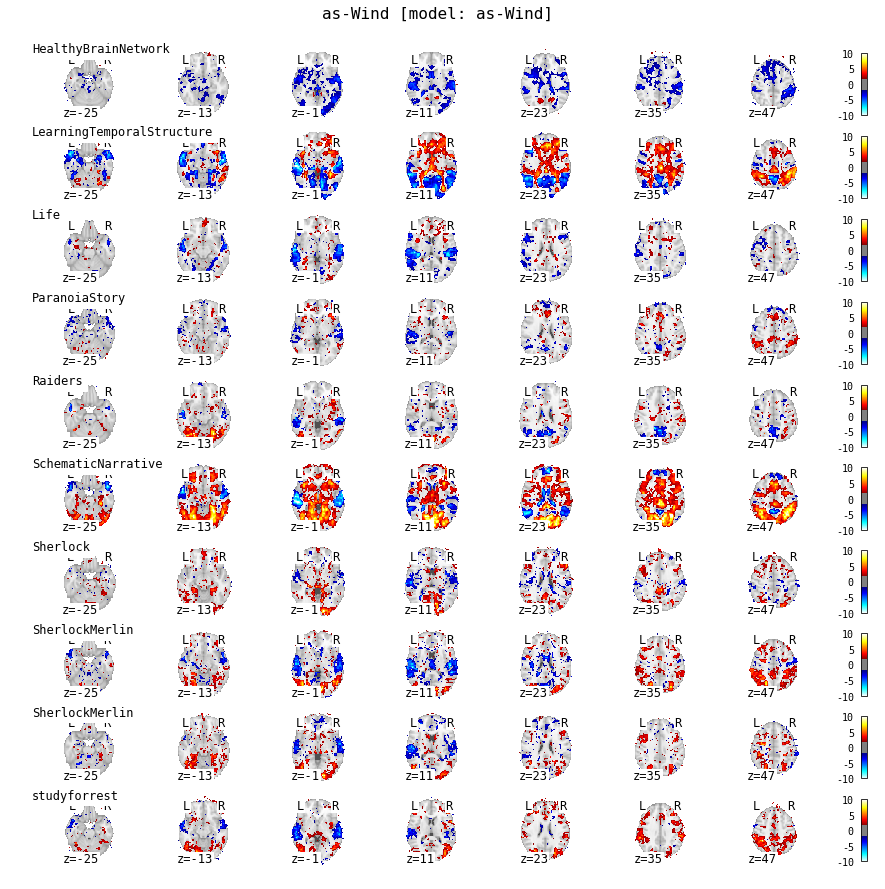

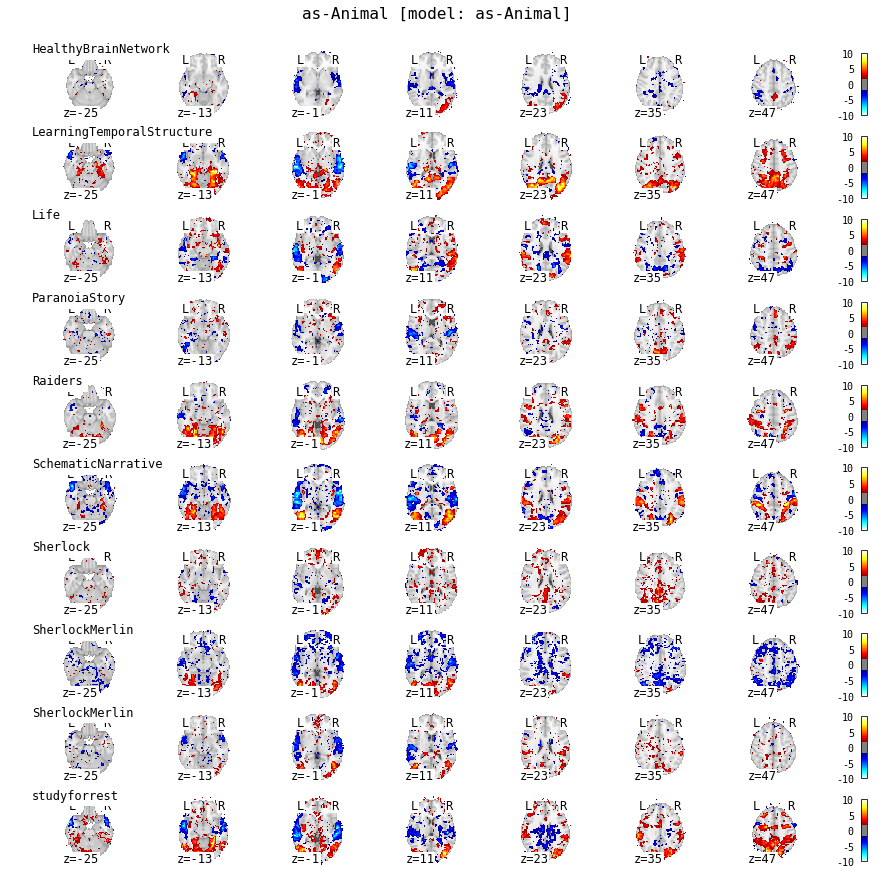

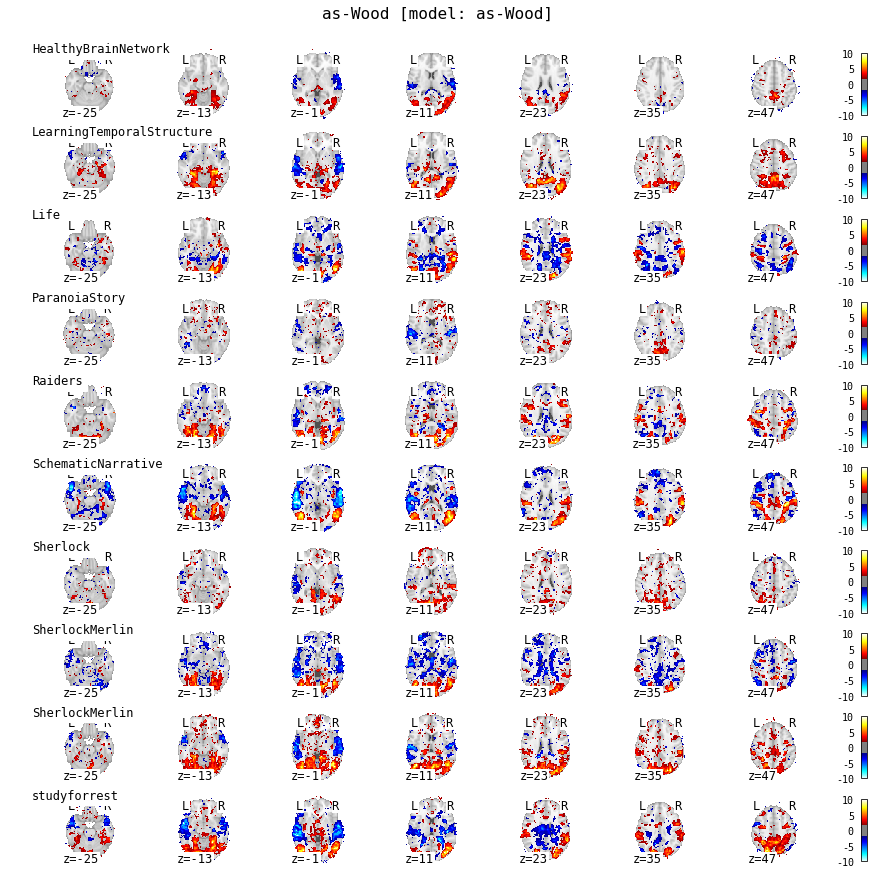

In [22]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                          vmax=10, draw_cross=True, 
                          figsize=(15,15), colorbar=True, threshold=1.96)